<a href="https://colab.research.google.com/github/Ibituyi/Encryptix/blob/main/Ionospheric_Data_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


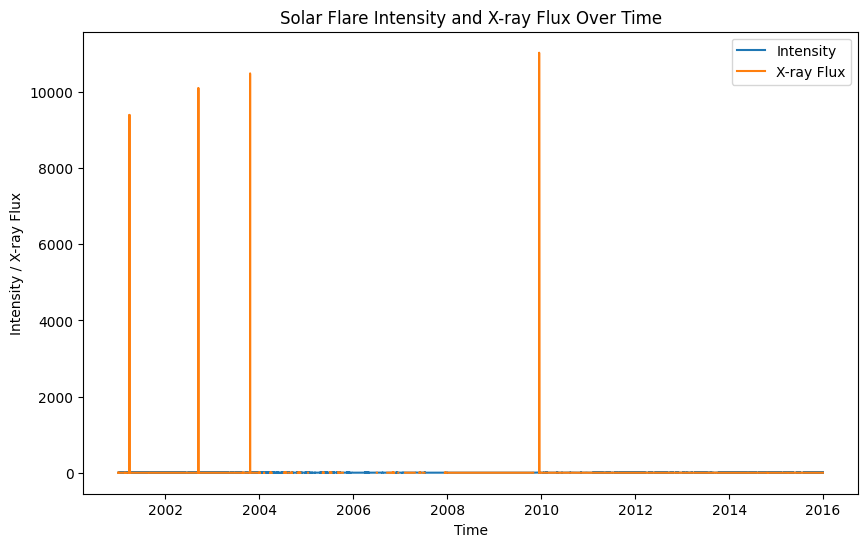

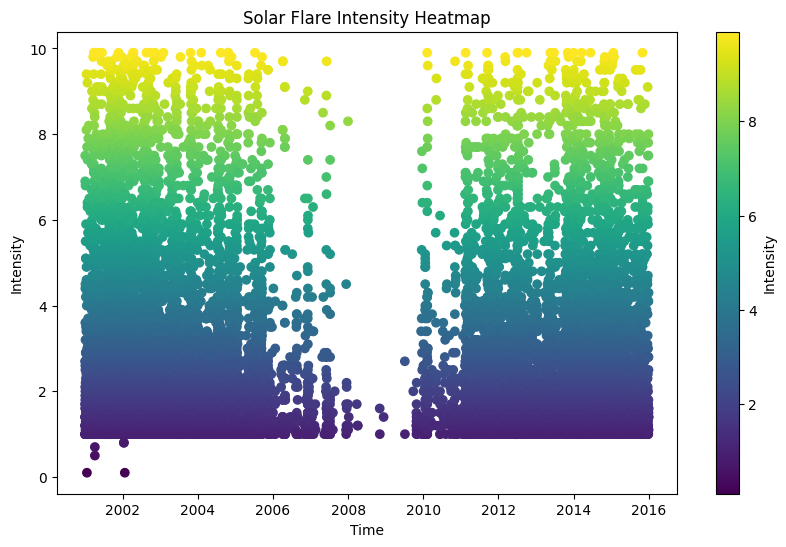

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_excel('/content/drive/MyDrive/adjusted_solar_flare_data (1).xlsx')

# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Plotting a line graph
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Intensity'], label='Intensity')
plt.plot(data['Timestamp'], data['X-ray Flux'], label='X-ray Flux')
plt.xlabel('Time')
plt.ylabel('Intensity / X-ray Flux')
plt.title('Solar Flare Intensity and X-ray Flux Over Time')
plt.legend()
plt.show()

# Plotting a heatmap
plt.figure(figsize=(10, 6))
plt.scatter(data['Timestamp'], data['Intensity'], c=data['Intensity'], cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Solar Flare Intensity Heatmap')
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('/content/drive/MyDrive/DataSets/Ionospheric Data/Chilton/CSV/2001.csv')

# Convert the 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Set 'Time' as the index
data.set_index('Time', inplace=True)

# Replace non-numeric values (e.g., '---') with NaN
data.replace('---', np.nan, inplace=True)

# Convert columns to numeric (in case they are still objects)
data = data.apply(pd.to_numeric, errors='coerce')

# Group the data by day
grouped = data.groupby(pd.Grouper(freq='D'))

# Function to resample each day to 30-minute intervals
def resample_day(group):
    if not group.empty:
        # Determine the start and end times for the day
        start_time = group.index.min()
        end_time = group.index.max()

        # Create a date range for the day with 30-minute intervals
        date_range = pd.date_range(start=start_time, end=end_time, freq='30min')

        # Reindex the group to the new date range and interpolate missing values
        resampled_group = group.reindex(date_range).interpolate()
        return resampled_group
    else:
        return pd.DataFrame()

# Apply resampling to each group (day) and concatenate the results
resampled_data = pd.concat([resample_day(group) for _, group in grouped])

# Normalize the features
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(resampled_data), columns=resampled_data.columns, index=resampled_data.index)

# Save the processed data to a new CSV file
data_normalized.to_csv('2001_processed.csv')

# Display the first few rows of the processed data
print(data_normalized.head())

                               foF2      hmF2       TEC
2001-01-02 00:00:01+00:00  0.132616  0.578782  0.041212
2001-01-02 00:30:01+00:00  0.132616  0.578782  0.041212
2001-01-04 00:00:00+00:00  0.154122  0.637053  0.059394
2001-01-04 00:30:00+00:00  0.139785  0.607525  0.049697
2001-01-05 00:00:00+00:00  0.154122  0.643585  0.053333
